In [104]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import scipy.stats as sct
import math
import statistics as stat
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix

In [105]:
football_dataset = pd.read_csv('./data/dataset_football_cleaned.csv')
football_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12711 entries, 0 to 12710
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          12711 non-null  object 
 1   first_name                    11652 non-null  object 
 2   age                           12711 non-null  int64  
 3   nation                        12711 non-null  object 
 4   league                        12711 non-null  object 
 5   team                          12711 non-null  object 
 6   goals_selection               12711 non-null  int64  
 7   selections_nation             12711 non-null  int64  
 8   position                      12711 non-null  object 
 9   price                         12711 non-null  float64
 10  end_contract                  8434 non-null   float64
 11  goal_champ                    12711 non-null  float64
 12  assist_champ                  12711 non-null  float64
 13  o

In [106]:
def scatter_plot(x,y, xlab, ylab, name):
    plt.scatter(x=x, y=y)
    plt.title(name)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.savefig(name + '.png', bbox_inches = 'tight')
    plt.show()
    plt.savefig('scatterPlot.png')

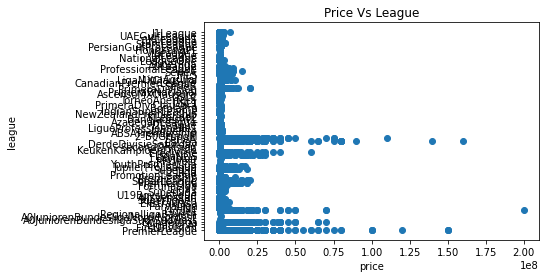

<Figure size 432x288 with 0 Axes>

In [118]:
scatter_plot(football_dataset['price'],football_dataset['league'], 'price', 'league' , 'Price Vs League')

## Missing Values

In [107]:
print(football_dataset.isnull().sum())
football_dataset = football_dataset.dropna()
print(football_dataset.info())

name                               0
first_name                      1059
age                                0
nation                             0
league                             0
team                               0
goals_selection                    0
selections_nation                  0
position                           0
price                              0
end_contract                    4277
goal_champ                         0
assist_champ                       0
own_goal_champ                     0
sub_on_champ                       0
sub_out_champ                      0
yellow_card_champ                  0
second_yellow_card_champ           0
red_card_champ                     0
penalty_goal_champ                 0
conceded_goal_champ                0
clean_sheet_champ                  0
goal_cup                           0
assist_cup                         0
own_goal_cup                       0
sub_on_cup                         0
sub_out_cup                        0
y

## Correlation

In [45]:
def createSimpleCorrelationMatrix():
    corr = football_dataset.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(football_dataset.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(football_dataset.columns)
    ax.set_yticklabels(football_dataset.columns)
    plt.savefig('CorrelationMatrix.png')
    plt.show()
    

def findHighestCorrelation():
    corr_matrix = football_dataset.corr().abs()
    plt.savefig('HighestCorrelation.png')

    # the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
           .stack()
           .sort_values(ascending=False))
    print(sol[:20])

def createGrafCorrelationMatrix():
    new_data = football_dataset[['penalty_goal_champ', 'second_yellow_card_continent', 'conceded_goal_champ', 'red_card_continent', 'red_card_cup', 'penalty_goal_cup', 'goal_champ', 'assist_champ', 'sub_on_champ', 'sub_out_champ', 'assist_continent' , 'sub_out_continent' , 'sub_on_cup' , 'sub_out_cup']]
    corrmat = new_data.corr()
    cg = sns.clustermap(corrmat, cmap="coolwarm", linewidths=0.1);
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    plt.savefig('CorrelationMatrix_Highest.png')
    plt.show()

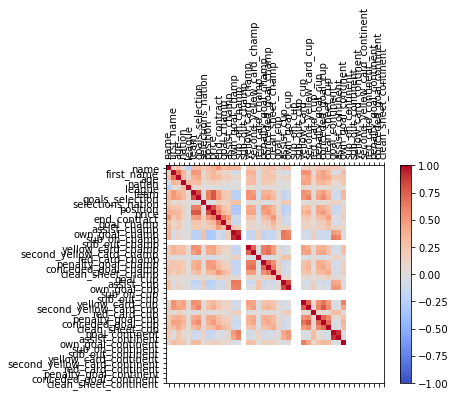

penalty_goal_champ            conceded_goal_champ             0.931968
second_yellow_card_continent  red_card_continent              0.901276
red_card_cup                  penalty_goal_cup                0.830648
goal_champ                    assist_champ                    0.824024
sub_on_champ                  sub_out_champ                   0.810519
assist_champ                  sub_out_champ                   0.785121
assist_continent              sub_out_continent               0.780656
goal_champ                    sub_out_champ                   0.768921
goal_continent                assist_continent                0.754541
sub_on_cup                    sub_out_cup                     0.733069
goal_cup                      assist_cup                      0.732661
sub_on_continent              sub_out_continent               0.722664
sub_out_continent             yellow_card_continent           0.696625
assist_cup                    sub_out_cup                     0.692384
goals_

<Figure size 432x288 with 0 Axes>

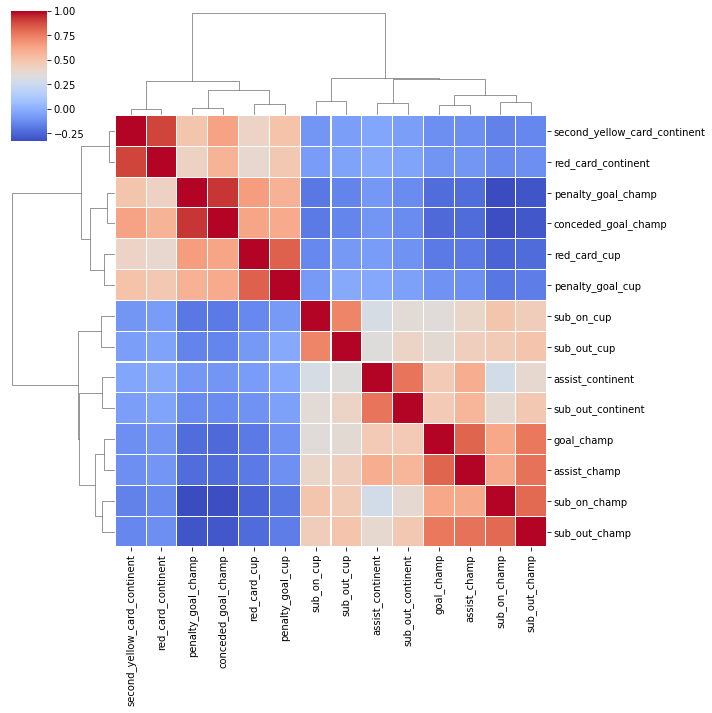

In [46]:
createSimpleCorrelationMatrix()
findHighestCorrelation()
createGrafCorrelationMatrix()

## Distribution

In [94]:
def scatterMatrix(data):
    Matrix = scatter_matrix(data, alpha=1, figsize=(5,5))
    # plt.title(title, fontsize=10)
    plt.savefig('scatterMatrix1.png')
    plt.show()


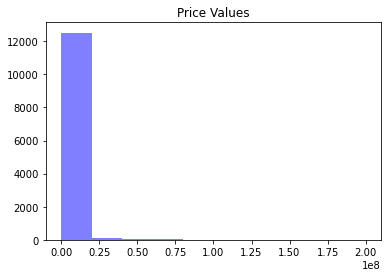

In [93]:

plt.figure(1)
plt.title('Price Values')
fig1 = plt.hist(football_dataset['price'], facecolor='blue', alpha=0.5)
plt.savefig('PriceHistogram.png', bbox_inches = 'tight')

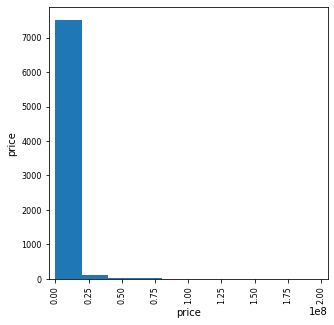

In [110]:
scatterMatrix(football_dataset[['position', 'price']])
# scatterMatrix(football_dataset[['penalty_goal_champ', 'red_card_cup']])

In [101]:
fig1 = px.scatter(football_dataset, x='price', y='league', title='Price vs League')
plt.savefig('priceleague.png')
fig1.show()


<Figure size 432x288 with 0 Axes>

In [111]:
mbappe = football_dataset.loc[football_dataset['price'] == 200000000]
mbappe[['position','goals_selection','goal_champ','penalty_goal_champ', 'goal_cup', 'penalty_goal_cup', 'goal_continent', 'penalty_goal_continent']]

,position,goals_selection,goal_champ,penalty_goal_champ,goal_cup,penalty_goal_cup,goal_continent,penalty_goal_continent
1291,RightWinger,10,47.0,0.0,10.0,1.0,13.0,0.0


## The strikers score more goals than midfielders by 11

## Strikers score on average 25 goals


I NEED TO USE INDEPENDENT T-TEST

            total_goals
position               
Defender           29.0
Goalkeeper         16.0
Midfielder      75514.0
Striker         55342.0


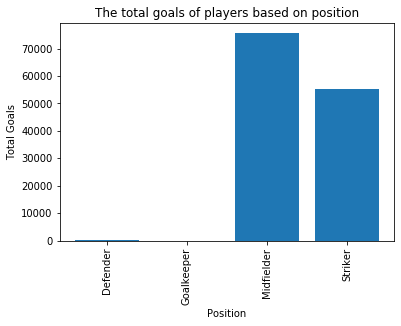

            total_goals
position               
Defender       0.453125
Goalkeeper     0.010568
Midfielder    17.992376
Striker       29.188819


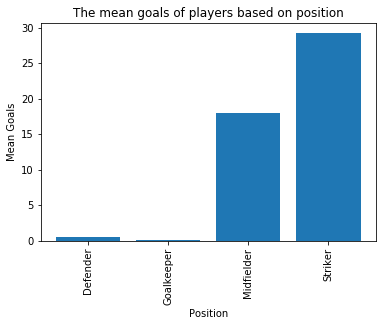

            total_goals
position               
Defender            0.0
Goalkeeper          0.0
Midfielder         11.0
Striker            19.5


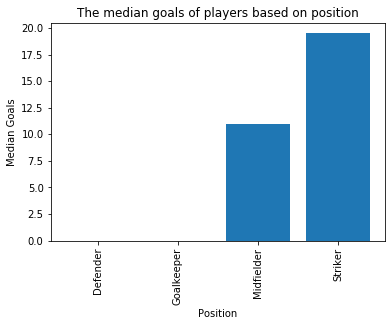

In [8]:
football_dataset['total_goals'] = football_dataset.apply(lambda row: row.goals_selection +  
                                                         row.goal_champ + row.goal_cup
                                                         + row.goal_continent
                                                        , axis=1)
football_dataset['total_assists'] = football_dataset.apply(lambda row: 
                                                         row.assist_champ + row.assist_cup
                                                         + row.assist_continent
                                                        , axis=1)
football_dataset['position'] = football_dataset['position'].map(
    {'AttackingMidfield': 'Midfielder', 
     'CentralMidfield': 'Midfielder',
     'DefensiveMidfield': 'Midfielder',
     'LeftMidfield': 'Midfielder',
     'RightMidfield': 'Midfielder',
     'Goalkeeper': 'Goalkeeper',
     'Defender': 'Defender',
     'LeftWinger': 'Striker',
     'RightWinger': 'Striker',
     'SecondStriker': 'Striker',
     'Forward': 'Striker',
     'Midfielder': 'Midfielder'}
)


goals_data = football_dataset[['total_goals', 'position']]
new_data = goals_data.groupby(['position']).sum()
print(new_data)
plt.bar(new_data.index, new_data['total_goals'])
plt.title("The total goals of players based on position")
plt.xlabel('Position')
plt.ylabel('Total Goals')
plt.xticks(new_data.index, rotation='vertical')

plt.savefig('./visualizations/total_goals_positions.jpeg')
plt.show()




mean_data = goals_data.groupby(['position']).mean()
print(mean_data)
plt.bar(mean_data.index, mean_data['total_goals'])
plt.xticks(mean_data.index, rotation='vertical')
plt.title("The mean goals of players based on position")
plt.xlabel('Position')
plt.ylabel('Mean Goals')
plt.savefig('./visualizations/mean_goals_positions.jpeg')
plt.show()

median_data = goals_data.groupby(['position']).median()
print(median_data)
plt.bar(median_data.index, median_data['total_goals'])
plt.xticks(median_data.index, rotation='vertical')
plt.title("The median goals of players based on position")
plt.xlabel('Position')
plt.ylabel('Median Goals')
plt.savefig('./visualizations/median_goals_positions.jpeg')
plt.show()

In [9]:
strikers = football_dataset.loc[football_dataset['position']=='Striker']['total_goals']

midfielders = football_dataset.loc[football_dataset['position']=='Midfielder']['total_goals']

t_test = (strikers.mean()-midfielders.mean()-11)/math.sqrt((stat.stdev(strikers)**2/len(strikers))+(stat.stdev(midfielders)**2/len(midfielders)))
df = (len(strikers) + len(midfielders)) - 2
p = (1 - sct.t.cdf(abs(t_test), df)) * 2
print(p)


0.815802983526638


### Strikers are more expensive than midfielders by 800k

I NEED INDEPDENT T-TEST

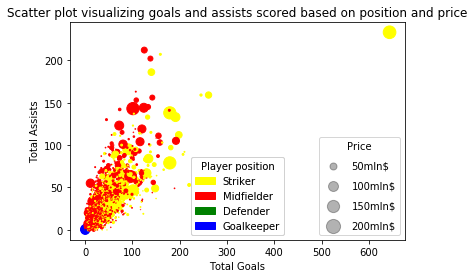

In [10]:
import matplotlib.patches as mpatches



colors = football_dataset['position'].map(
    {'Midfielder': 'red', 
     'Goalkeeper': 'blue',
     'Defender': 'green',
     'Striker': 'yellow',}
)
fig, ax = plt.subplots()

ax.scatter(football_dataset['total_goals'], football_dataset['total_assists'], s=football_dataset['price']/1000000, c=colors)
plt.title("Scatter plot visualizing goals and assists scored based on position and price")
plt.xlabel("Total Goals")
plt.ylabel("Total Assists")
hist, bin_edges = np.histogram(football_dataset.price, density=True, bins=4)
bins = bin_edges.tolist()
bins.pop(0)
for area in bins:
    plt.scatter([], [], c="k", alpha=0.3, s=area/1000000,
                label=str(round(area/1000000))+ 'mln$')
leg1 = plt.legend(loc='lower right', scatterpoints=1, frameon=True, labelspacing=1, title='Price')


colorlegend = [mpatches.Patch(color='yellow', label='Striker'), mpatches.Patch(color='red', label='Midfielder'), mpatches.Patch(color='green', label='Defender'), mpatches.Patch(color='blue', label='Goalkeeper')]


leg2 = plt.legend(handles=colorlegend,
             loc='lower center', frameon=True, ncol=1, title="Player position")

ax.add_artist(leg1)
ax.add_artist(leg2)

plt.show()

In [113]:
# plt.bar(football_dataset['position'], football_dataset['price'])
# plt.show()

KeyboardInterrupt: 

                   price
position                
Defender    5.125000e+06
Goalkeeper  1.968770e+09
Midfielder  1.032892e+10
Striker     6.092275e+09


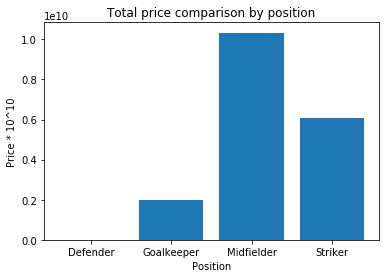

In [12]:
price_data = football_dataset[['price', 'position']]
price_total = price_data.groupby(['position']).sum()

print(price_total)
plt.bar(price_total.index, price_total['price'])
plt.title('Total price comparison by position')
plt.xlabel('Position')
plt.ylabel('Price * 10^10')
plt.show()

                   price
position                
Defender    8.007812e+04
Goalkeeper  1.300376e+06
Midfielder  2.461025e+06
Striker     3.213225e+06


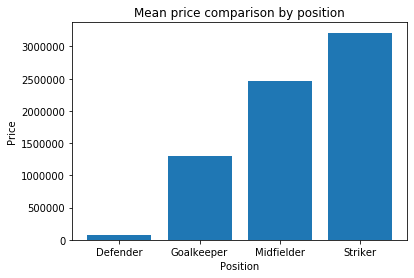

In [13]:
price_data = football_dataset[['price', 'position']]
price_mean = price_data.groupby(['position']).mean()
print(price_mean)
plt.bar(price_mean.index, price_mean['price'])
plt.title('Mean price comparison by position')
plt.xlabel('Position')
plt.ylabel('Price')
plt.show()

                      price
position                   
AttackingMidfield  500000.0
CentralMidfield    500000.0
Defender            50000.0
DefensiveMidfield  450000.0
Forward             50000.0
Goalkeeper         275000.0
LeftMidfield       400000.0
LeftWinger         500000.0
Midfielder          50000.0
RightMidfield      337500.0
RightWinger        500000.0
SecondStriker      500000.0


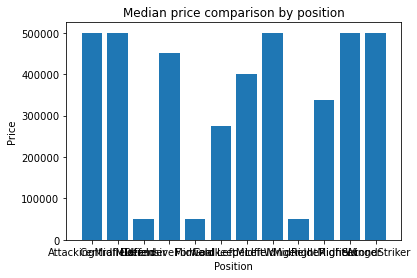

In [112]:
price_data = football_dataset[['price', 'position']]
price_median = price_data.groupby(['position']).median()
print(price_median)
plt.bar(price_median.index, price_median['price'])
plt.title('Median price comparison by position')
plt.xlabel('Position')
plt.ylabel('Price')
plt.show()

In [15]:
strikers_price = football_dataset.loc[football_dataset['position']=='Striker']['price']
midfielders_price = football_dataset.loc[football_dataset['position']=='Midfielder']['price']
t_test = (strikers_price.mean()-midfielders_price.mean()-800000)/math.sqrt((stat.stdev(strikers_price)**2/len(strikers_price))+(stat.stdev(midfielders_price)**2/len(midfielders_price)))
df = (len(strikers_price) + len(midfielders_price)) - 2
p = (1 - sct.t.cdf(abs(t_test), df)) * 2
print(p)

0.8696216106842796


### La liga league players are the most expensive by 10mil

I NEED INDEPENDENT T-TEST

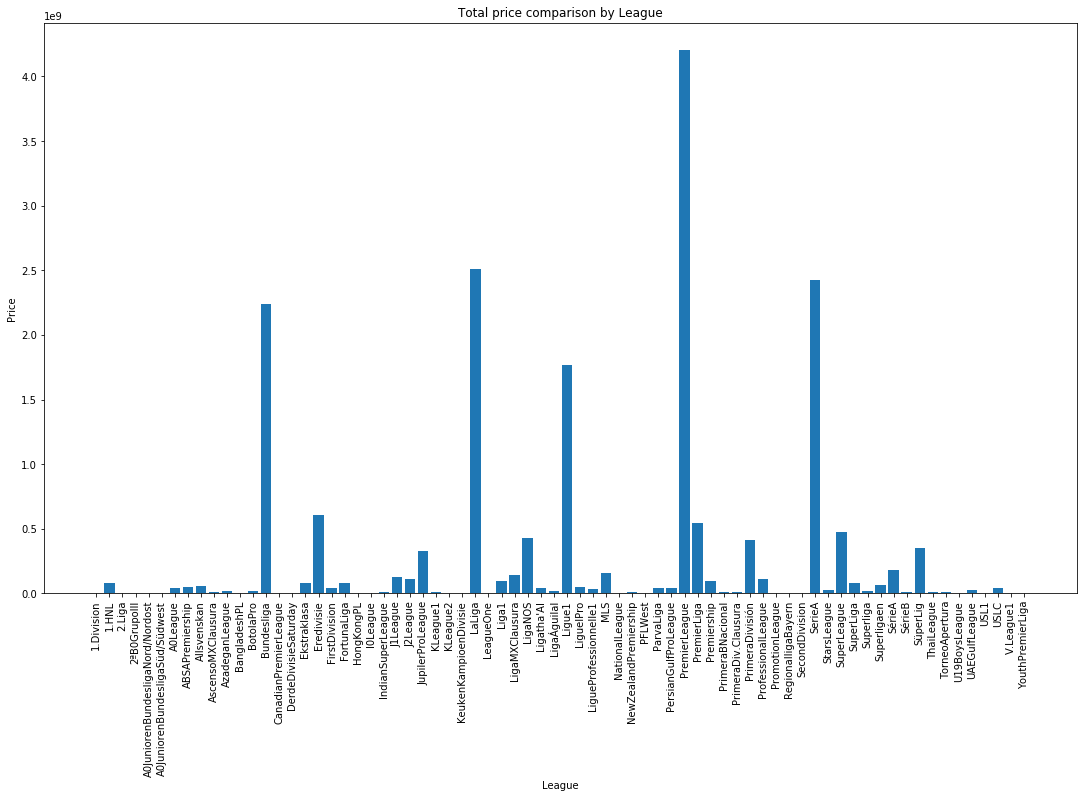

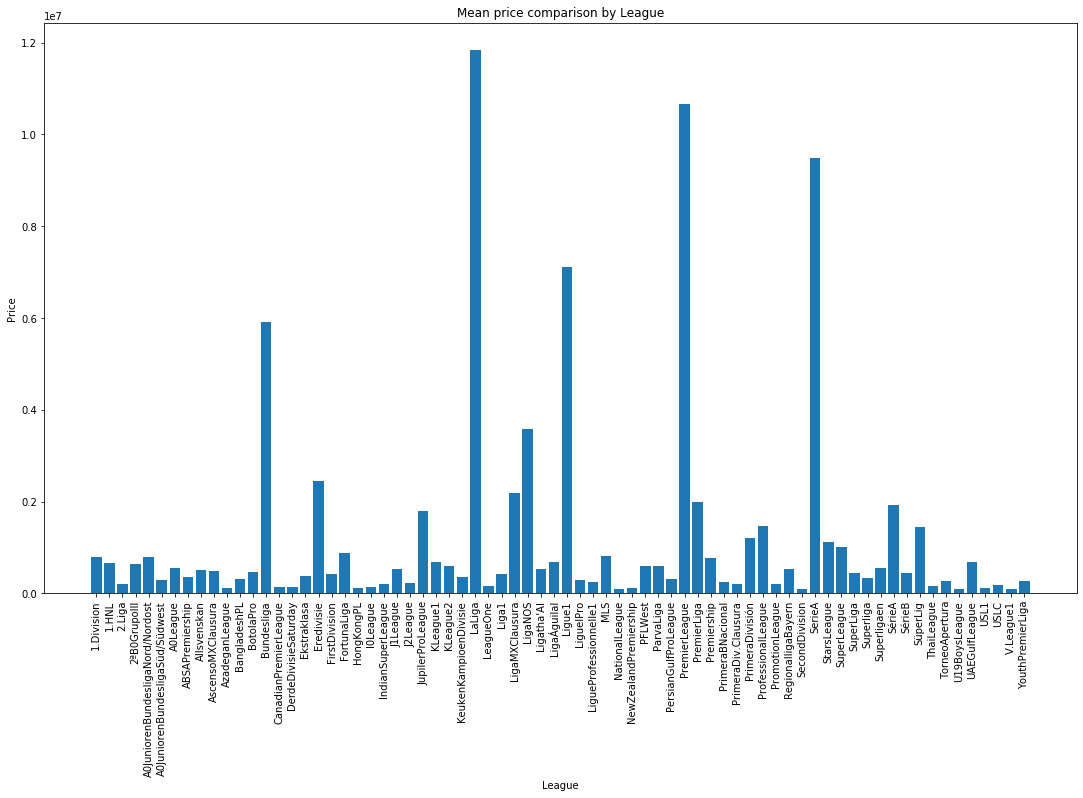

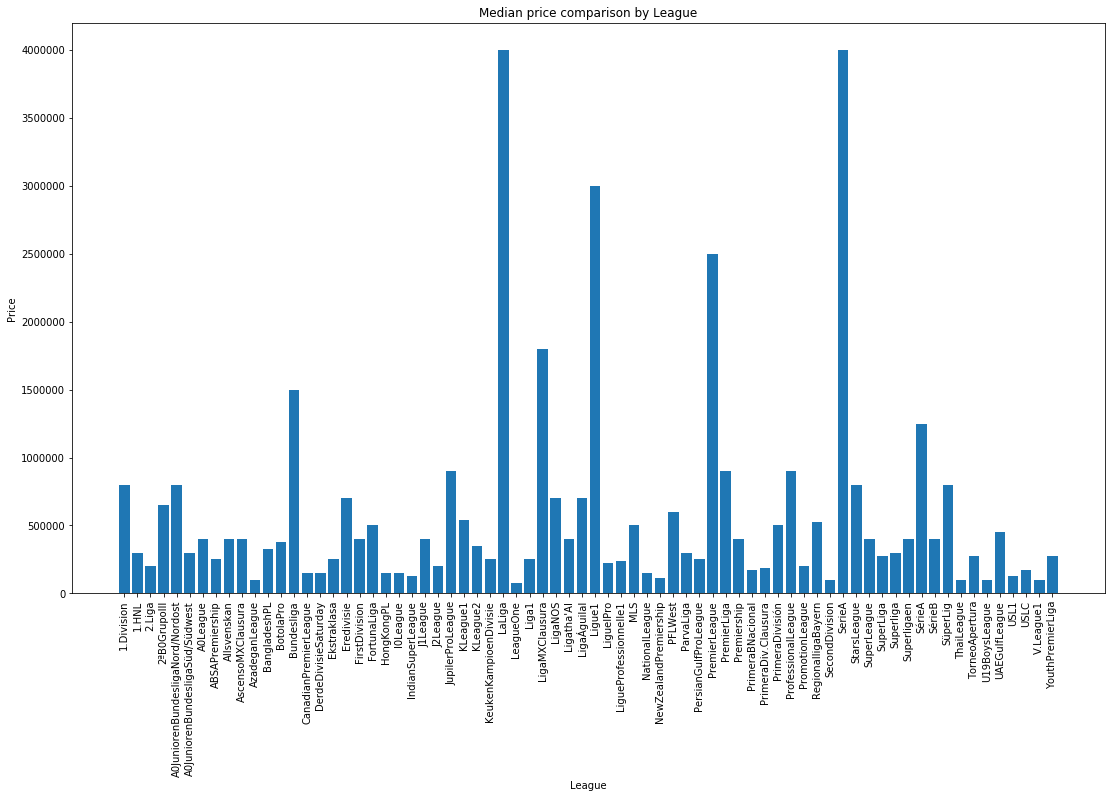

In [16]:
league_data = football_dataset[['league', 'price', 'total_goals']]
league_price = league_data.groupby(['league']).sum()

plt.bar(league_price.index, league_price['price'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xticks(league_price.index, rotation='vertical')
plt.title('Total price comparison by League')
plt.xlabel('League')
plt.ylabel('Price')
plt.show()

league_mean = league_data.groupby(['league']).mean()
league_median = league_data.groupby(['league']).median()

plt.bar(league_mean.index, league_mean['price'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xticks(league_mean.index, rotation='vertical')
plt.title('Mean price comparison by League')
plt.xlabel('League')
plt.ylabel('Price')
plt.show()


plt.bar(league_median.index, league_median['price'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xticks(league_median.index, rotation='vertical')
plt.title('Median price comparison by League')
plt.xlabel('League')
plt.ylabel('Price')
plt.show()

In [17]:
laLiga_price = football_dataset.loc[football_dataset['league']=='LaLiga']['price']
print(laLiga_price.mean())
other_price = football_dataset.loc[football_dataset['league']!='LaLiga']['price']
print(other_price.mean())
t_test = (laLiga_price.mean()-other_price.mean()-10000000)/math.sqrt((stat.stdev(laLiga_price)**2/len(laLiga_price))+(stat.stdev(other_price)**2/len(other_price)))
df = (len(laLiga_price) + len(other_price)) - 2
p = (1 - sct.t.cdf(abs(t_test), df)) * 2
print(p)

11845047.169811321
2129499.9329668856
0.8512777527883189


### Find the most aggresive league

I NEED INDEPENDENT T-TEST

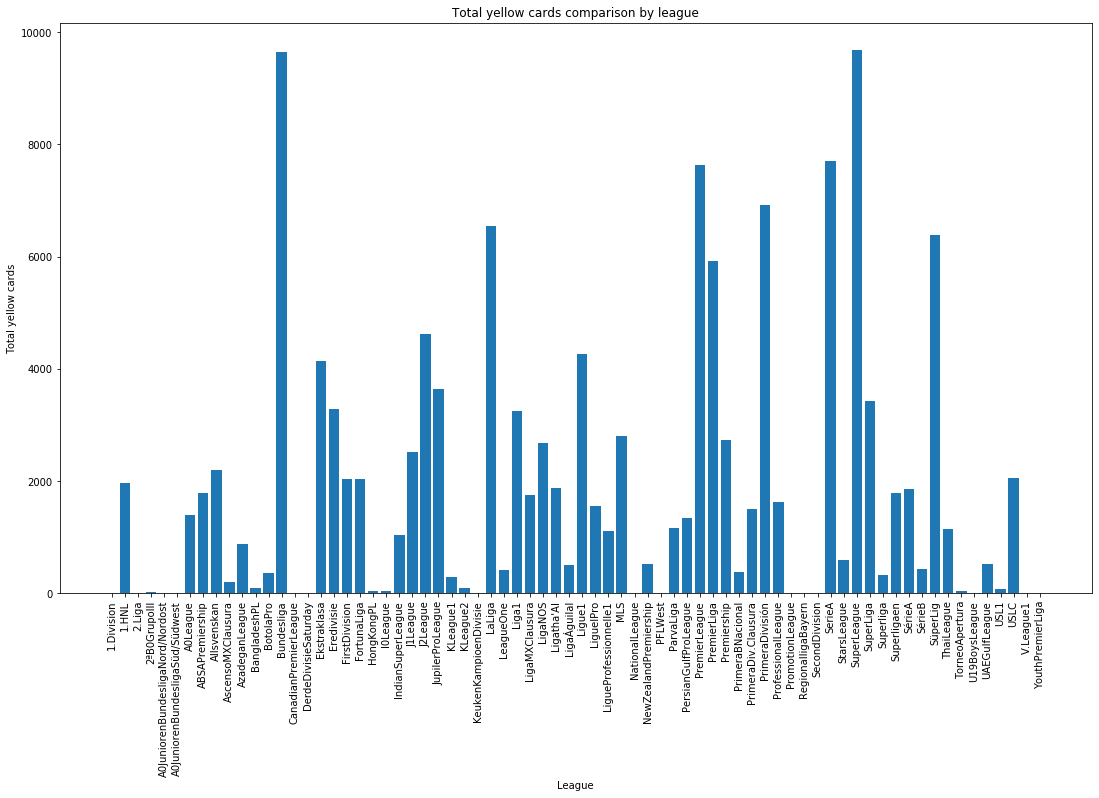

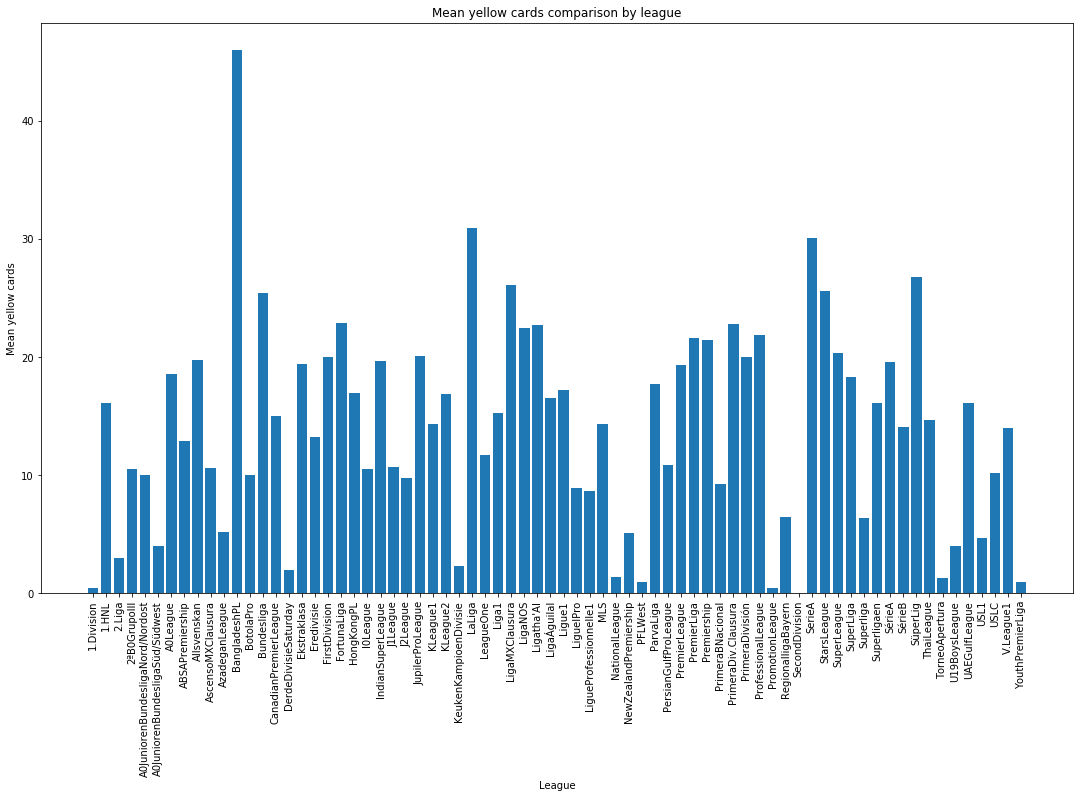

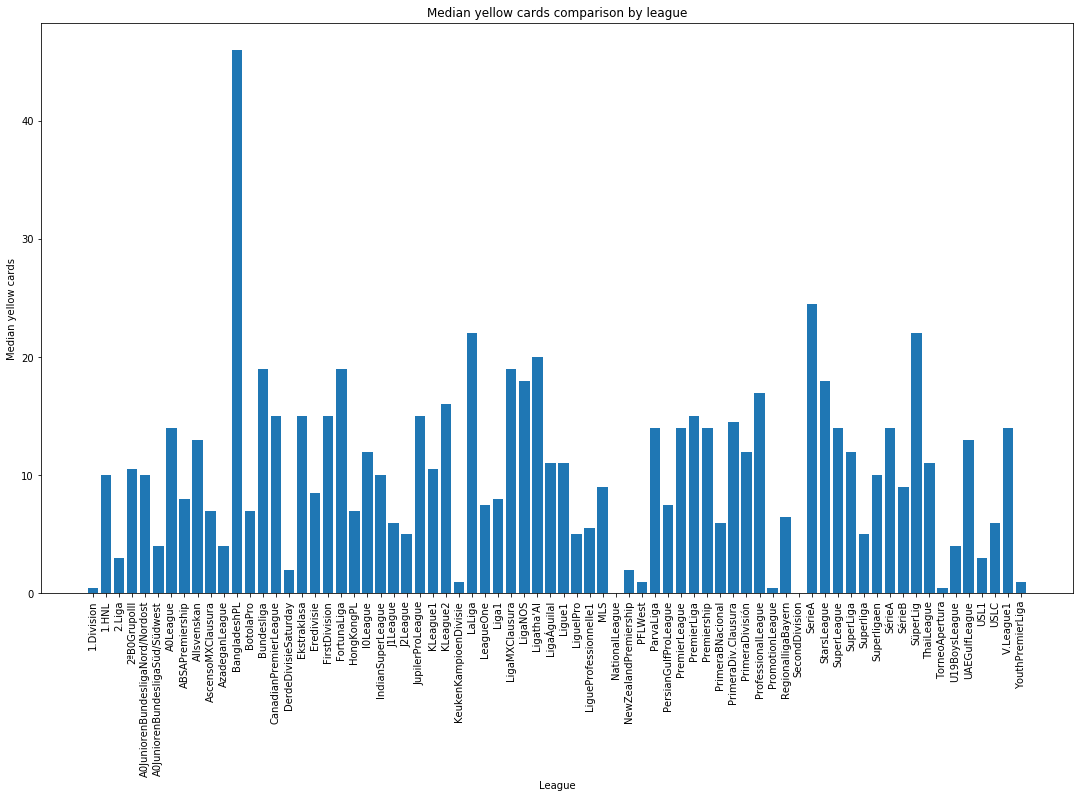

In [18]:
yellow_card = football_dataset[['league', 'yellow_card_champ']]
total_yellow_card = yellow_card.groupby(['league']).sum()

plt.bar(total_yellow_card.index, total_yellow_card['yellow_card_champ'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xticks(total_yellow_card.index, rotation='vertical')
plt.title('Total yellow cards comparison by league')
plt.xlabel('League')
plt.ylabel('Total yellow cards')
plt.show()

mean_yellow_card = yellow_card.groupby(['league']).mean()

plt.bar(mean_yellow_card.index, mean_yellow_card['yellow_card_champ'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xticks(mean_yellow_card.index, rotation='vertical')
plt.title('Mean yellow cards comparison by league')
plt.xlabel('League')
plt.ylabel('Mean yellow cards')
plt.show()


median_yellow_card = yellow_card.groupby(['league']).median()

plt.bar(median_yellow_card.index, median_yellow_card['yellow_card_champ'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xticks(median_yellow_card.index, rotation='vertical')
plt.title('Median yellow cards comparison by league')
plt.xlabel('League')
plt.ylabel('Median yellow cards')
plt.show()

In [19]:
bangladesh_yellow = football_dataset.loc[football_dataset['league']=='BangladeshPL']['yellow_card_champ']
print(bangladesh_yellow.mean())
other_yellow = football_dataset.loc[football_dataset['league']!='BangladeshPL']['yellow_card_champ']
print(other_price.mean())
t_test = (bangladesh_yellow.mean()-other_yellow.mean()-28.8)/math.sqrt((stat.stdev(bangladesh_yellow)**2/len(bangladesh_yellow))+(stat.stdev(other_yellow)**2/len(other_yellow)))
df = (len(bangladesh_yellow) + len(other_yellow)) - 2
p = (1 - sct.t.cdf(abs(t_test), df)) * 2
print(p)

46.0
2129499.9329668856
0.0605933265181533


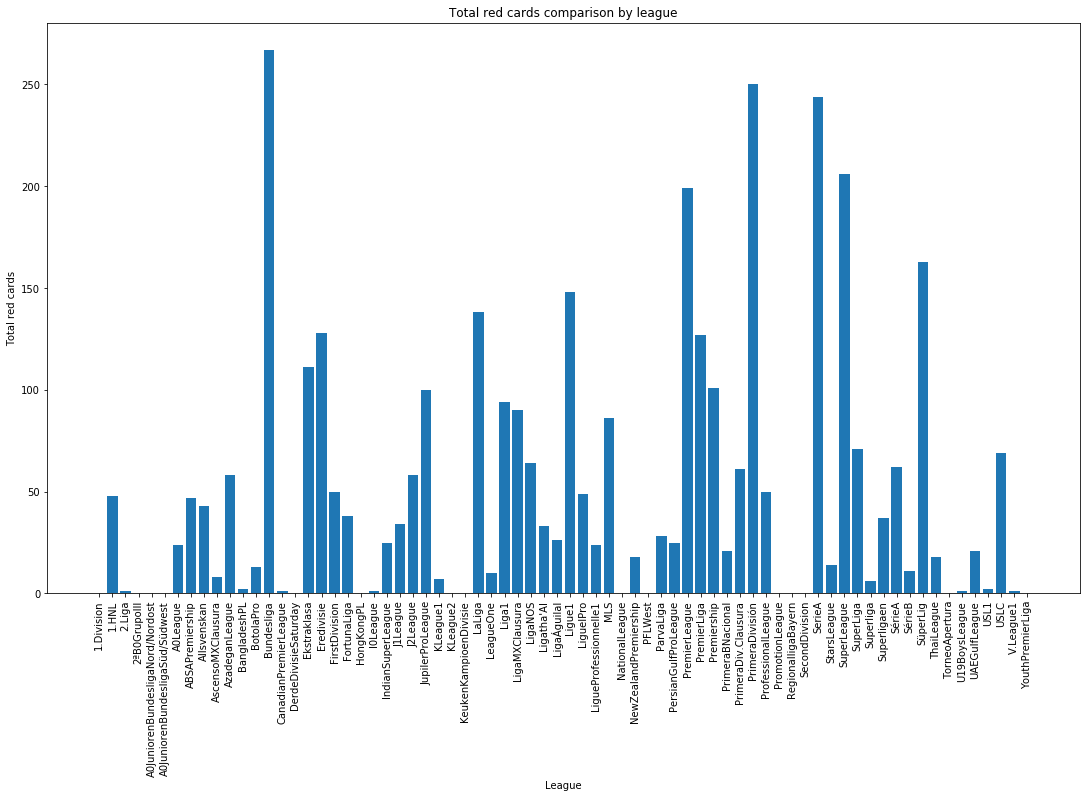

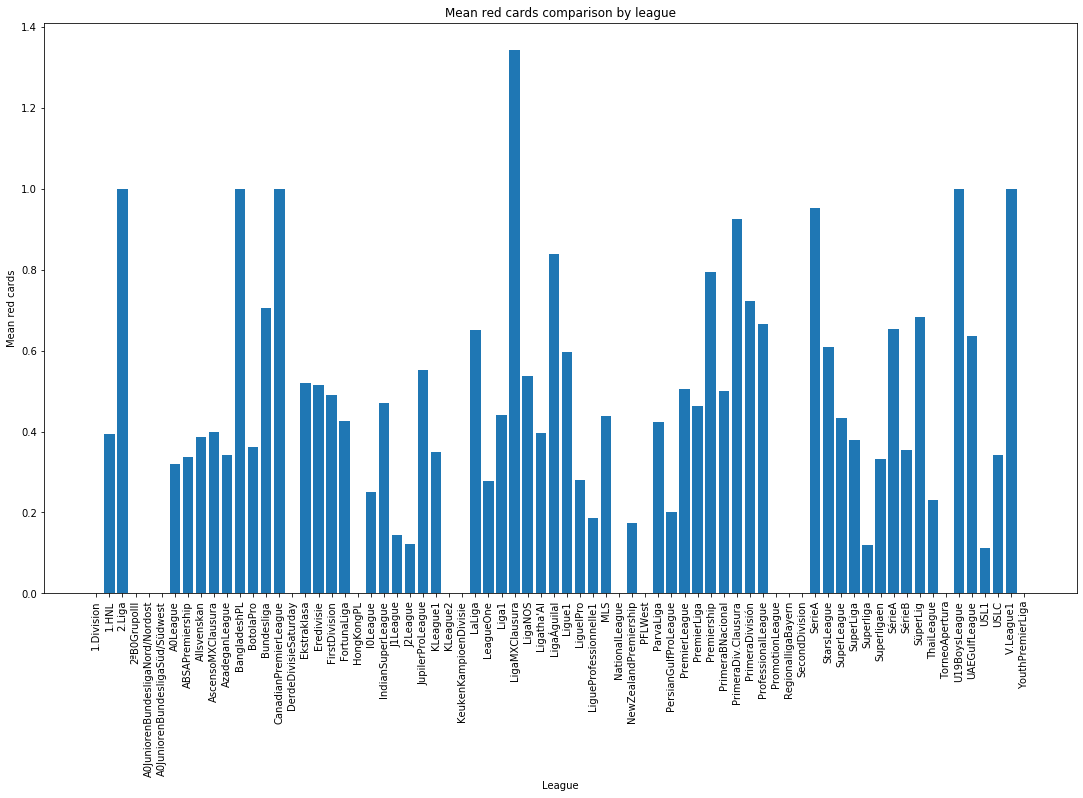

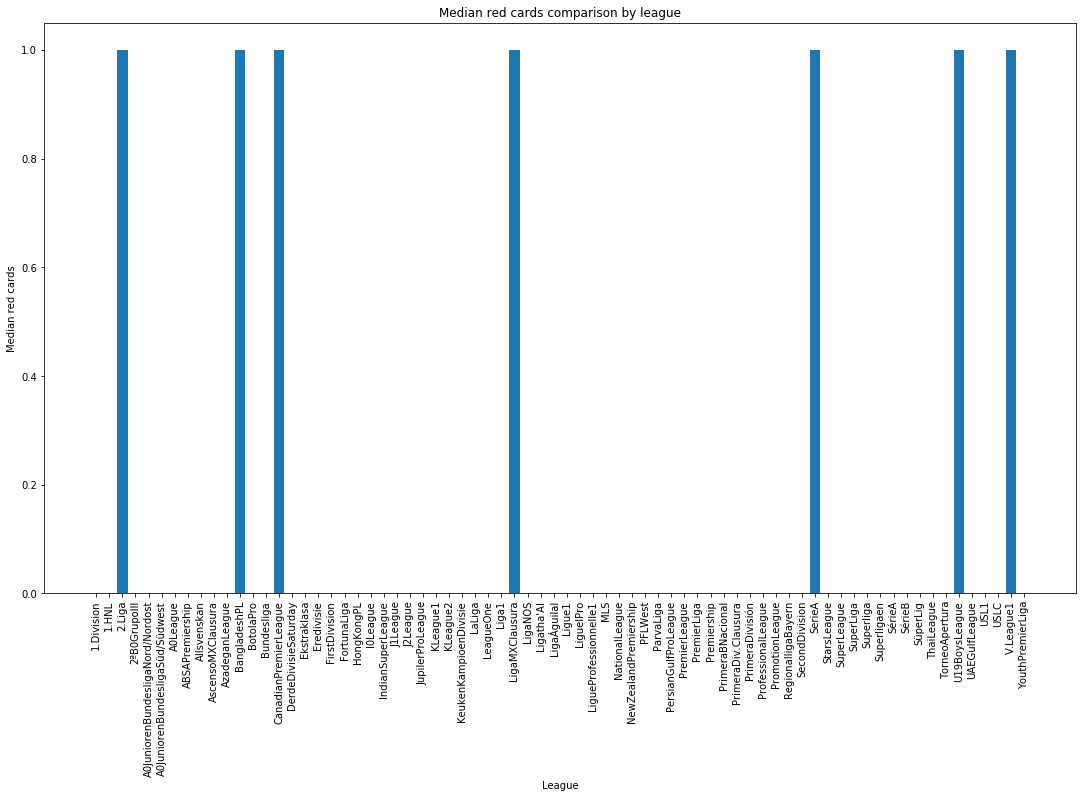

In [20]:
red_card = football_dataset[['league', 'red_card_champ']]
total_red_card = red_card.groupby(['league']).sum()

plt.bar(total_red_card.index, total_red_card['red_card_champ'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xticks(total_red_card.index, rotation='vertical')
plt.title('Total red cards comparison by league')
plt.xlabel('League')
plt.ylabel('Total red cards')
plt.show()

mean_red_card = red_card.groupby(['league']).mean()

plt.bar(mean_red_card.index, mean_red_card['red_card_champ'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xticks(mean_red_card.index, rotation='vertical')
plt.title('Mean red cards comparison by league')
plt.xlabel('League')
plt.ylabel('Mean red cards')
plt.show()


median_red_card = red_card.groupby(['league']).median()

plt.bar(median_red_card.index, median_red_card['red_card_champ'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xticks(median_red_card.index, rotation='vertical')
plt.title('Median red cards comparison by league')
plt.xlabel('League')
plt.ylabel('Median red cards')
plt.show()

### Find the relation between end_contract and price

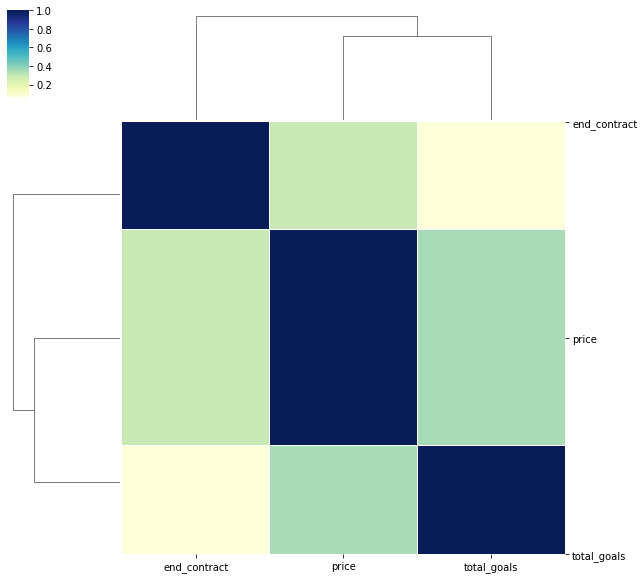

In [21]:
#Use the correlation implemented as part of task 1
#Find the top 5 most correlated features
#Check for interesting results

corr_data = football_dataset[['price', 'end_contract', 'total_goals']]
corrmat = corr_data.corr()
cg = sn.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [22]:
print(football_dataset.isnull().sum())

name                            0
first_name                      0
age                             0
nation                          0
league                          0
team                            0
goals_selection                 0
selections_nation               0
position                        0
price                           0
end_contract                    0
goal_champ                      0
assist_champ                    0
own_goal_champ                  0
sub_on_champ                    0
sub_out_champ                   0
yellow_card_champ               0
second_yellow_card_champ        0
red_card_champ                  0
penalty_goal_champ              0
conceded_goal_champ             0
clean_sheet_champ               0
goal_cup                        0
assist_cup                      0
own_goal_cup                    0
sub_on_cup                      0
sub_out_cup                     0
yellow_card_cup                 0
second_yellow_card_cup          0
red_card_cup  

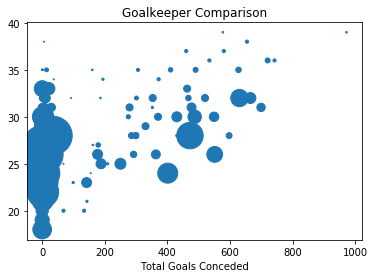

In [23]:
football_dataset['total_goals_conceded'] = football_dataset.apply(lambda row: row.conceded_goal_champ +  
                                                         row.penalty_goal_champ + row.penalty_goal_cup
                                                         + row.conceded_goal_cup + row.penalty_goal_continent + row.conceded_goal_continent
                                                        , axis=1)

goalkeepers = football_dataset.loc[football_dataset['position'] == 'Goalkeeper']
goalkeepers = football_dataset.loc[football_dataset['league'] == 'PremierLeague']

plt.scatter(goalkeepers['total_goals_conceded'], goalkeepers['age'], s=goalkeepers['price']/100000)
plt.title('Goalkeeper Comparison')
plt.xlabel('Total Goals Conceded')
plt.show()


### The mean of red cards received should be equal to the mean of second_yellow_cards

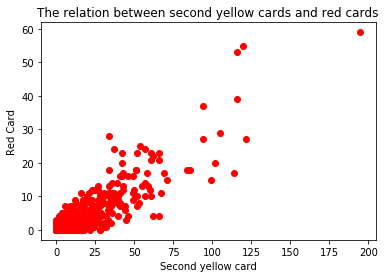

second_yellow_card_continent    9360.0
dtype: float64
red_card_continent    2387.0
dtype: float64


In [24]:
plt.scatter(football_dataset['second_yellow_card_continent'], football_dataset['red_card_continent'], c='red')
plt.title('The relation between second yellow cards and red cards')
plt.xlabel('Second yellow card')
plt.ylabel('Red Card')
plt.show()

print(football_dataset[['second_yellow_card_continent']].sum())
print(football_dataset[['red_card_continent']].sum())

In [25]:
red_cards = football_dataset['red_card_continent']
print(red_cards.mean())
second_yellow = football_dataset['second_yellow_card_continent']
print(second_yellow.mean())
print(pearsonr(red_cards, second_yellow)[0])

0.3111719462912267
1.2201798983183418
0.9012760545183615


### The players with high numbers of goals have also a high number of assists

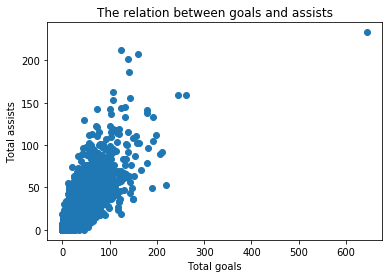

In [26]:
plt.scatter(football_dataset['total_goals'], football_dataset['total_assists'])
plt.title('The relation between goals and assists')
plt.xlabel('Total goals')
plt.ylabel('Total assists')
plt.show()

In [27]:
goals = football_dataset['total_goals']
assists = football_dataset['total_assists']
print(goals.mean())
print(assists.mean())

print(pearsonr(goals, assists)[0])

17.064398383522356
13.003780471907183
0.8384753079551601


## Significance testing 

In [117]:
from scipy.stats import ttest_ind
laLiga_price = football_dataset.loc[football_dataset['league']=='LaLiga']['price']
other_price = football_dataset.loc[football_dataset['league']!='LaLiga']['price']
ttest_ind(laLiga_price,other_price)



Ttest_indResult(statistic=16.961888504817544, pvalue=2.2275721251522033e-63)

In [ ]:
from scipy.stats import pearsonr
stat, p = pearsonr(laLiga_price,other_price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')